#데이터

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 파일 경로 설정
file_path = '/content/drive/MyDrive/ai기획 실습/0709/Carseats.csv'

# CSV 불러오기
df = pd.read_csv(file_path)

# 상위 5개 행 확인
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#독립변수별 영향력

In [ ]:
model = smf.ols('Sales ~ CompPrice+	Income+	Advertising+	Population+	Price+	ShelveLoc+	Age+	Education+	Urban+	US', data=df)
olsfit = model.fit()
print(olsfit.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          1.60e-166
Time:                        05:16:19   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606    

#데이터 분석

In [ ]:
# #sales에 유의미한 독립변수들
#✔️ 유의미한 변수 (p < 0.05):
# - ShelveLoc[T.Good] (+4.85)
# - ShelveLoc[T.Medium] (+1.96)
# - CompPrice (+0.093)
# - Income (+0.016)
# - Advertising (+0.123)
# - Price (–0.095)
# - Age (–0.046)

# ❌ 영향력 없는 변수 (p > 0.05):
# - Urban[T.Yes] (p=0.277)
# - US[T.Yes] (p=0.220)
# - Population (p=0.575)
# - Education (p=0.285)


##shelveloc

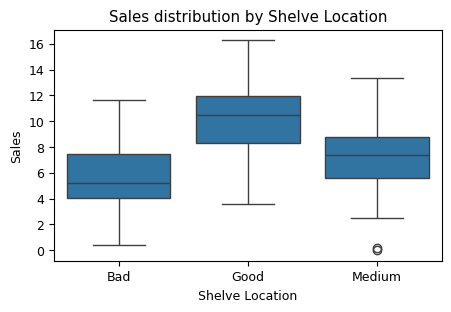

In [ ]:
# Visualize the relationship between ShelveLoc and Sales using a box plot
sns.boxplot(x='ShelveLoc', y='Sales', data=df)
plt.title('Sales distribution by Shelve Location')
plt.xlabel('Shelve Location')
plt.ylabel('Sales')
plt.show()

##advertising

<Axes: xlabel='Advertising', ylabel='Sales'>

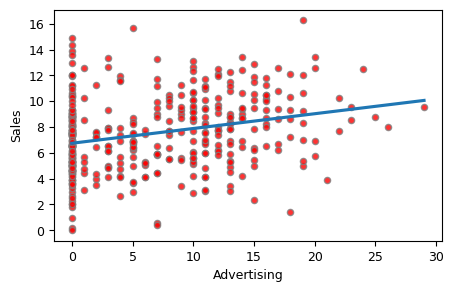

In [ ]:
plt.rcParams['figure.figsize'] = (5,3) # 그림 크기를 전체적으로(globally) 설정
plt.rcParams.update({'font.size': 9}) # 그림 폰트를 전체적으로(globally) 설정

sns.regplot(x='Advertising', y='Sales', data=df,
            order=1, ci=None, scatter_kws={'color':'r', 's':20, 'edgecolor':'grey'})

In [ ]:
model = smf.ols('Sales ~ Advertising', data=df)
olsfit = model.fit()
print(olsfit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     31.17
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           4.38e-08
Time:                        06:34:02   Log-Likelihood:                -967.27
No. Observations:                 400   AIC:                             1939.
Df Residuals:                     398   BIC:                             1947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.7370      0.192     35.007      

In [ ]:
# 1. 광고비(Advertising) == 0인 데이터만 추출
df_zero_ad = df[df['Advertising'] == 0]

# 2. 해당 subset으로 회귀 모델 생성
model = smf.ols('Sales ~ Advertising', data=df_zero_ad)
olsfit = model.fit()

# 3. 결과 출력
print(olsfit.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 09 Jul 2025   Prob (F-statistic):                nan
Time:                        06:34:23   Log-Likelihood:                -348.19
No. Observations:                 144   AIC:                             698.4
Df Residuals:                     143   BIC:                             701.4
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.8245      0.227     30.051      

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<Axes: xlabel='Ad_Group', ylabel='Sales'>

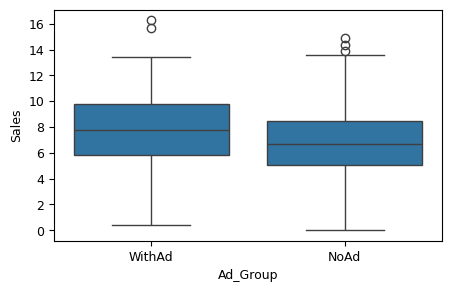

In [ ]:
df['Ad_Group'] = df['Advertising'].apply(lambda x: 'NoAd' if x == 0 else 'WithAd')
sns.boxplot(x='Ad_Group', y='Sales', data=df)


##age

<Axes: xlabel='Age', ylabel='Sales'>

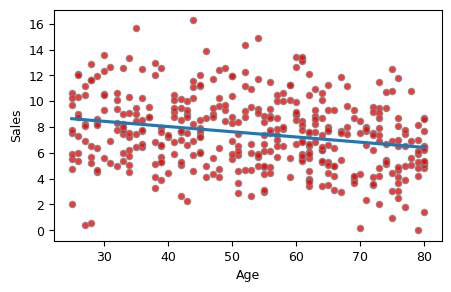

In [ ]:
plt.rcParams['figure.figsize'] = (5,3) # 그림 크기를 전체적으로(globally) 설정
plt.rcParams.update({'font.size': 9}) # 그림 폰트를 전체적으로(globally) 설정

sns.regplot(x='Age', y='Sales', data=df,
            order=1, ci=None, scatter_kws={'color':'r', 's':20, 'edgecolor':'grey'})

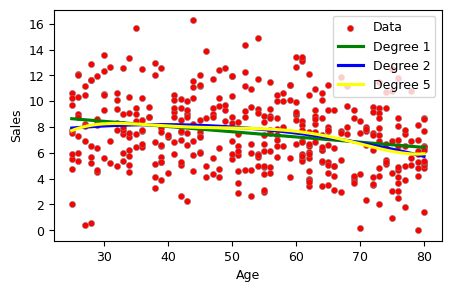

In [ ]:
plt.rcParams['figure.figsize'] = (5,3)  # 그림 크기
plt.rcParams.update({'font.size': 9})  # 폰트 크기

# 산점도 (한 번만 그림)
sns.scatterplot(x='Age', y='Sales', data=df, color='r', s=20, edgecolor='grey', label='Data')

# 회귀선: 1차, 2차, 5차
sns.regplot(x='Age', y='Sales', data=df, order=1, ci=None, scatter=False, color='g', label='Degree 1')
sns.regplot(x='Age', y='Sales', data=df, order=2, ci=None, scatter=False, color='blue', label='Degree 2')
sns.regplot(x='Age', y='Sales', data=df, order=5, ci=None, scatter=False, color='yellow', label='Degree 5')

# 범례 추가
plt.legend()
plt.show()
